## Import packages

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## Load data

In [ ]:
X_train = np.loadtxt('../../../data/faces_train.txt')
y_train = np.loadtxt('../../../data/faces_train_labels.txt')
X_train.shape, y_train.shape

((280, 1024), (280,))

In [ ]:
X_test = np.loadtxt('../../../data/faces_test.txt')
y_test= np.loadtxt('../../../data/faces_test_labels.txt')
X_test.shape, y_test.shape

((120, 1024), (120,))

### Understand the data

In [ ]:
sample = X_train[0]
sample.shape

(1024,)

In [ ]:
X_train.shape[0] / 40

7.0

In [ ]:
X_test.shape[0] / 40

3.0

## Define a function to convert the data to image array and display the face images.

In [ ]:
def show_images(arr, num_person, num_faces):
    data = arr[:num_person*10]
    fig, axs = plt.subplots(num_person, num_faces, figsize=(num_faces, num_person))
    flat_axs = axs.flatten()
    for i in range(num_person):
        for j in range(num_faces):
            flat_axs[i*num_faces+j].imshow(arr[i * int(arr.shape[0] / 40) + j].reshape(32, 32).T)
            flat_axs[i*num_faces+j].axis('off')
    plt.set_cmap('gray')
    plt.tight_layout()
    plt.show()

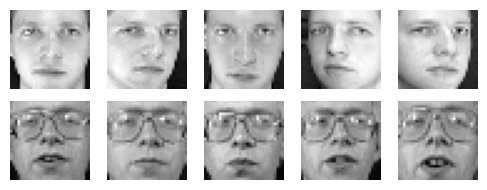

In [ ]:
show_images(X_train, 2, 5)